In [1]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class GradientBoostedRegressor:
    
    def __init__(self,ntrees=100, learning_rate = 1,tree_depth=1):
        
        self.ntrees = ntrees
        self.learning_rate = learning_rate
        self.tree_depth = tree_depth
        
    def fit(self, X, y, Xtest, ytest):
        
        if(len(X.shape) == 1):
            X = X.reshape(-1,1)
            Xtest = Xtest.reshape(-1,1)
            
        count = 0
        
        self.trees = []
        self.training_mse = []
        self.test_mse = []
        
        resids = y
        while count < self.ntrees:
            count += 1
            cur_tree = DecisionTreeRegressor(max_depth= self.tree_depth)
            cur_tree.fit(X,resids)
            self.trees.append(cur_tree)
            
            resids = resids - self.learning_rate*cur_tree.predict(X)
            
            
            self.training_mse.append(((y-self.predict(X))**2).mean())
            self.test_mse.append(((ytest-self.predict(Xtest))**2).mean())
            
    def predict(self,X):
        if(len(X.shape) == 1):
            X = X.reshape(-1,1)
            
        preds = 0
        for tree in self.trees:
            preds += tree.predict(X)*self.learning_rate
            
        return(preds)

In [3]:
X = np.linspace(0,25,1000)
y = np.sin(X) + np.random.randn(1000)*.5

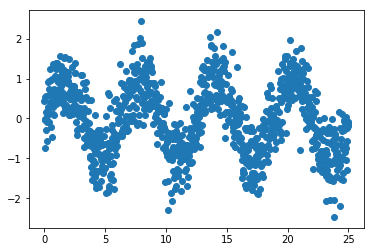

In [4]:
plt.scatter(X,y)

In [5]:
inds = list(range(len(X)))
train_inds = np.random.choice(inds,100)

In [6]:
Xtrain,ytrain = X[train_inds], y[train_inds]
Xtest,ytest = X[-train_inds], y[-train_inds]

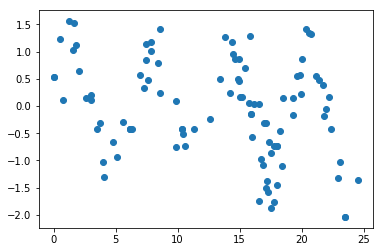

In [7]:
plt.scatter(Xtrain,ytrain)

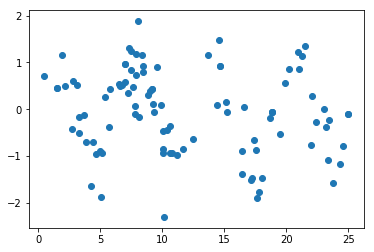

In [8]:
plt.scatter(Xtest,ytest)

In [9]:
gbtree = GradientBoostedRegressor(ntrees=100, learning_rate=1,tree_depth=4)

In [10]:
gbtree.fit(X,y,Xtest,ytest)

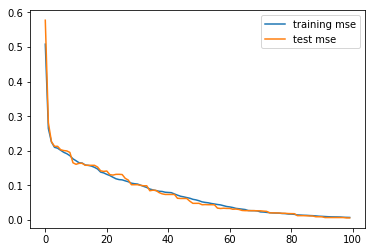

In [11]:
plt.plot(gbtree.training_mse, label = 'training mse')
plt.plot(gbtree.test_mse, label = 'test mse')
plt.legend()

In [12]:
preds = gbtree.predict(Xtest)

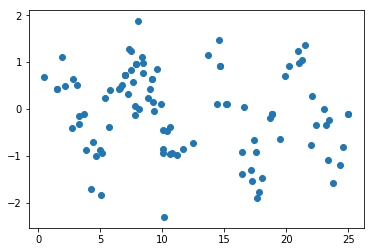

In [13]:
plt.scatter(Xtest,preds)

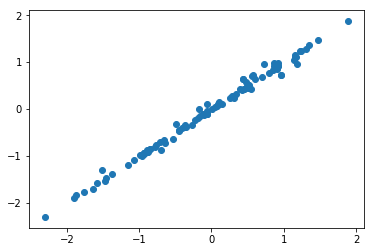

In [14]:
plt.scatter(ytest,preds)